In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Subset
import sys
import os

sys.path.append(os.path.abspath('..')) #so we can import for the dir above
from combined_data_script import get_data
from medication_data_script import LeakageOption
from SimpleCNN import SimpleCNN
from utils import train_loop, eval_loop

We dont train model00 because it would have a no changes to the weights in the criterion so its the same as the best model from week03 dir: 00_no_movment

**train model01** (the one with oversampled daily samples)

In [16]:
data_dic = get_data(flatten=False,leakage_option=LeakageOption.FULL_LEAKAGE, stride=50, filter_static=False, oversamp_daily=2.5)
train, dev, test = data_dic['train'], data_dic['dev'], data_dic['test'] 
len(train), len(dev), len(test) #note it is NOT shuffled we will nedd to do this 

All daily dir: ['2024-08-02_13_34_07', '2024-07-12_06_44_51', '2024-07-27_09_42_08', '2024-07-10_06_42_46', '2024-08-16_11_10_13', '2024-07-15_06_54_24', '2024-07-25_08_15_51', '2024-07-20_08_05_50', '2024-08-01_13_00_51']
Daily dir after train: ['2024-07-12_06_44_51', '2024-07-27_09_42_08', '2024-07-10_06_42_46', '2024-08-16_11_10_13', '2024-07-15_06_54_24', '2024-07-25_08_15_51', '2024-07-20_08_05_50', '2024-08-01_13_00_51']
Daily dir after dev: ['2024-07-27_09_42_08', '2024-07-10_06_42_46', '2024-08-16_11_10_13', '2024-07-15_06_54_24', '2024-07-25_08_15_51', '2024-07-20_08_05_50', '2024-08-01_13_00_51']
Daily dir for test: ['2024-07-10_06_42_46', '2024-08-16_11_10_13', '2024-07-15_06_54_24', '2024-07-25_08_15_51', '2024-07-20_08_05_50', '2024-08-01_13_00_51']


(12511, 1302, 1306)

In [13]:

#important that we shuffle THEY ARE NOT IF WE DONT
torch.manual_seed(69)
train_loader = DataLoader(train, batch_size=64, shuffle=True)
dev_loader = DataLoader(dev, batch_size=2048, shuffle=True)

dropout = 0.75
model = SimpleCNN(dropout=dropout)

device = "cuda:0"
model = model.to(device)

pos_weight_tensor = torch.tensor([1.2]).to(device)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight_tensor)
optimizer =  torch.optim.AdamW(model.parameters(), lr=0.003, weight_decay=0.05)

100%|██████████| 150/150 [01:43<00:00,  1.44it/s]

best dev loss is 0.2623


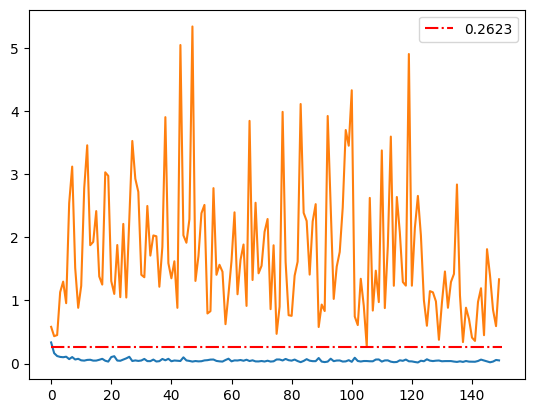

In [14]:
best_model = train_loop(model, device, optimizer, criterion, train_loader, dev_loader, dropout=dropout, epochs=150)

torch.Size([1302, 6, 400])
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       651
           1       0.92      0.93      0.93       651

    accuracy                           0.92      1302
   macro avg       0.92      0.92      0.92      1302
weighted avg       0.92      0.92      0.92      1302



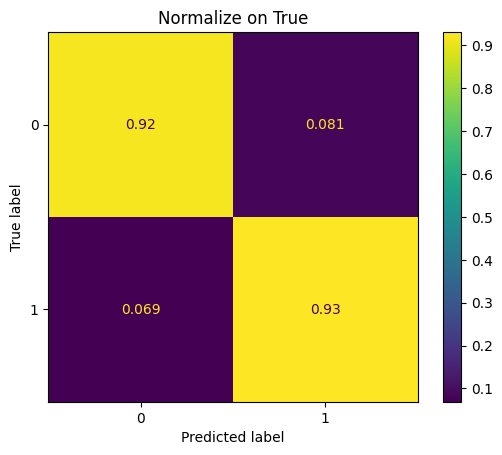

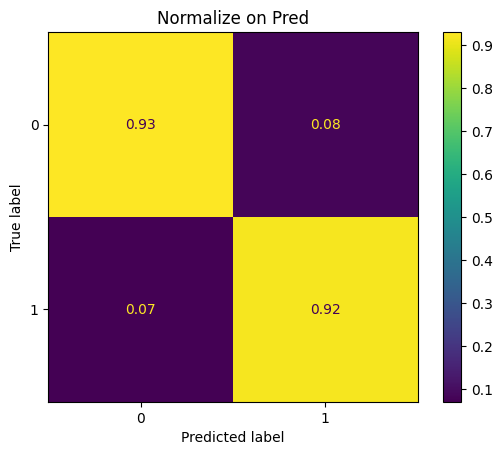

In [15]:
X, y = next(iter(dev_loader))
print(X.shape)
eval_loop(best_model, X, y)

In [ ]:
# torch.save(best_model.state_dict(), '94f1_ACIDENTALSAVEAugmented_loss_weights_simpcnn.pth') 

SO THAT MODEL DID TH BEST yet but now lets try again but do .8 insted of .9

In [15]:

#important that we shuffle THEY ARE NOT IF WE DONT
torch.manual_seed(69)
train_loader = DataLoader(train, batch_size=64, shuffle=True)
dev_loader = DataLoader(dev, batch_size=2048, shuffle=True)

dropout = 0.75
model = SimpleCNN(dropout=dropout)

device = "cuda:0"
model = model.to(device)

pos_weight_tensor = torch.tensor([0.8]).to(device)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight_tensor)
optimizer =  torch.optim.AdamW(model.parameters(), lr=0.003, weight_decay=0.05)

100%|██████████| 150/150 [01:11<00:00,  2.09it/s]

best dev loss is 0.2695


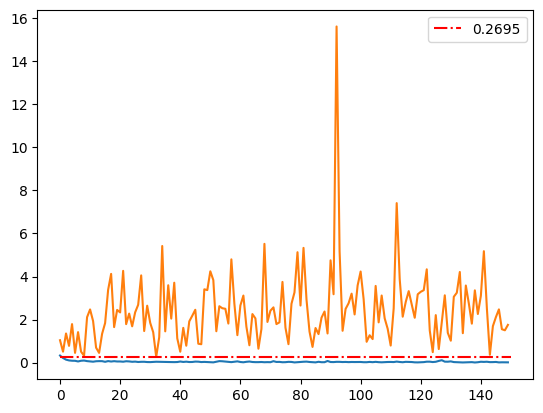

In [16]:
best_model = train_loop(model, device, optimizer, criterion, train_loader, dev_loader, dropout=dropout, epochs=150)

torch.Size([1302, 6, 400])
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       651
           1       0.93      0.92      0.93       651

    accuracy                           0.93      1302
   macro avg       0.93      0.93      0.93      1302
weighted avg       0.93      0.93      0.93      1302



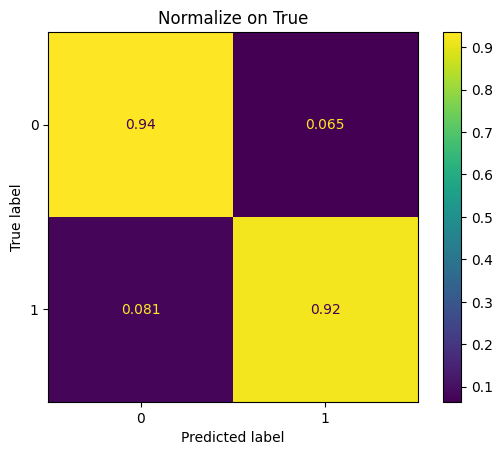

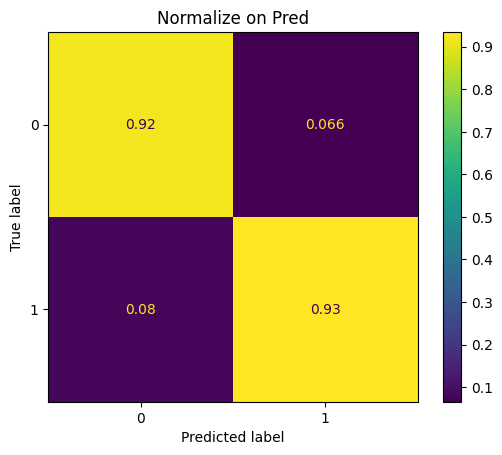

In [17]:
X, y = next(iter(dev_loader))
print(X.shape)
eval_loop(best_model, X, y)

In [ ]:
# torch.save(best_model.state_dict(), 'FAKESAVE93f1_overSampDaily_048fp.pth') 